# Baktash Ansari 
# 99521082

In [1]:
import torch
from torch import nn

# Creating our data:

x = torch.tensor([[
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0],
    [0,0,1,0,1,0,0,1],
    [1,0,1,1,1,1,1,1],
    [1,0,1,0,0,0,0,0],
    [1,1,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    ],[
    [0,0,0,0,0,1,0,1],
    [0,0,0,0,1,0,1,0],
    [0,0,0,0,0,1,0,0],
    [0,0,0,0,1,0,0,0],
    [1,0,0,0,1,0,0,0],
    [1,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    ],[
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1],
    [0,0,1,1,1,1,1,1],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0],
    ]], dtype=torch.float32)

y = torch.tensor([0, 1, 2])

print(x.shape)
print(y.shape)

torch.Size([3, 8, 8])
torch.Size([3])


## Creating MLP model with 2 layer:
## (64, 32) --> (ReLU)(32, 3) --> (3, 1)(Softmax)

Epoch 1:
Loss: 1.0972574949264526
Epoch 2:
Loss: 1.0498930215835571
Epoch 3:
Loss: 1.008313775062561
Epoch 4:
Loss: 0.9624857902526855
Epoch 5:
Loss: 0.9147303700447083
Epoch 6:
Loss: 0.8643980026245117
Epoch 7:
Loss: 0.8133600354194641
Epoch 8:
Loss: 0.7650784850120544
Epoch 9:
Loss: 0.721364438533783
Epoch 10:
Loss: 0.6835429668426514
Epoch 11:
Loss: 0.6517414450645447
Epoch 12:
Loss: 0.6273422241210938
Epoch 13:
Loss: 0.6078537106513977
Epoch 14:
Loss: 0.5926661491394043
Epoch 15:
Loss: 0.5811824798583984
Epoch 16:
Loss: 0.5726832747459412
Epoch 17:
Loss: 0.5665609240531921
Epoch 18:
Loss: 0.5622029900550842
Epoch 19:
Loss: 0.5591327548027039
Epoch 20:
Loss: 0.5569863319396973
Epoch 21:
Loss: 0.5555120706558228
Epoch 22:
Loss: 0.5544677376747131
Epoch 23:
Loss: 0.5537223815917969
Epoch 24:
Loss: 0.5531902313232422
Epoch 25:
Loss: 0.5528021454811096
Epoch 26:
Loss: 0.5525166988372803
Epoch 27:
Loss: 0.5523036122322083
Epoch 28:
Loss: 0.5521427989006042
Epoch 29:
Loss: 0.5520199537277

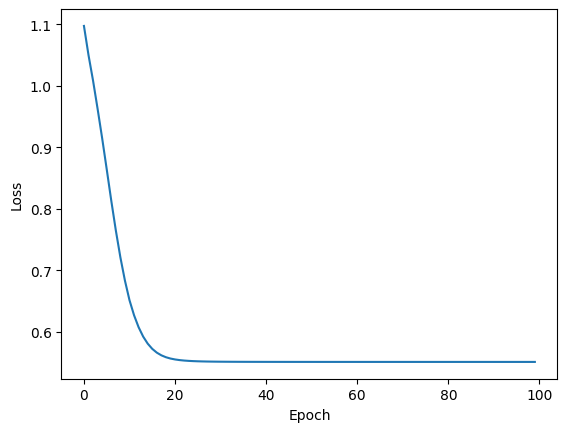

In [7]:
import matplotlib.pyplot as plt

class MLP(nn.Module):

    def __init__(self):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 3),
            nn.Softmax(dim = 1)
        )

    def forward(self, x) :
        return self.layers(x)
    


model = MLP()

lossFunction = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

loss_values = []

for epoch in range(100) : 
    print(f"Epoch {epoch + 1}:")
    

    #zero the gradients 
    optimizer.zero_grad()

    # forward passing
    output = model(x)

    # computer loss 
    loss = lossFunction(output, y)

    # back propagation
    loss.backward()

    # SGD 
    optimizer.step()

    print(f"Loss: {loss.item()}")

    # Append the average loss of this epoch to the list
    loss_values.append(loss.item())

# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('training_loss.png')
plt.show()
